# Exam 09/01/2023
1. Load the data file and explore the data, showing size, data descriptions,
data distributions with boxplot, pairplots 

In [155]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix


random_state=42

In [156]:
names=pd.read_csv("ML-Python-Lab-Data-Names.txt")
names=(np.array(names)[:,0])
df=pd.read_csv("ML-Python-Lab-Data.csv", names=names)
print("shape:",df.shape)
df.head()

shape: (4177, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.514,0.2245,0.1010,0.150,2.0
1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0
2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0
3,M,0.440,0.365,0.125,0.516,0.2155,0.1140,0.155,1.0
4,I,0.330,0.255,0.080,0.205,0.0895,0.0395,0.055,0.0


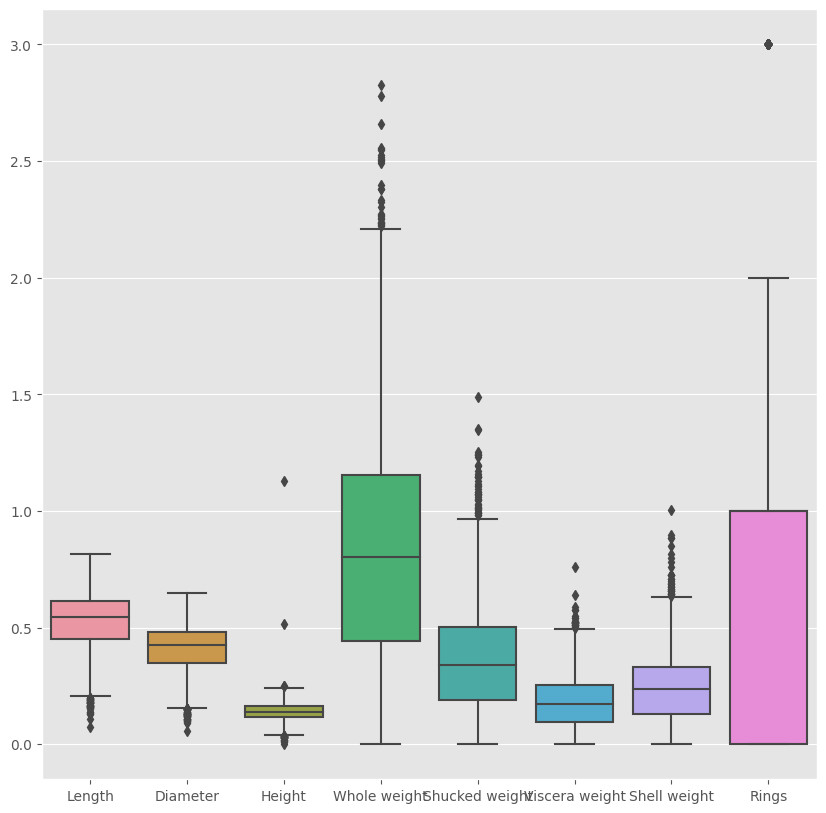

In [157]:
plt.figure(figsize=(10,10))
sns.boxplot(df)
target="Rings"

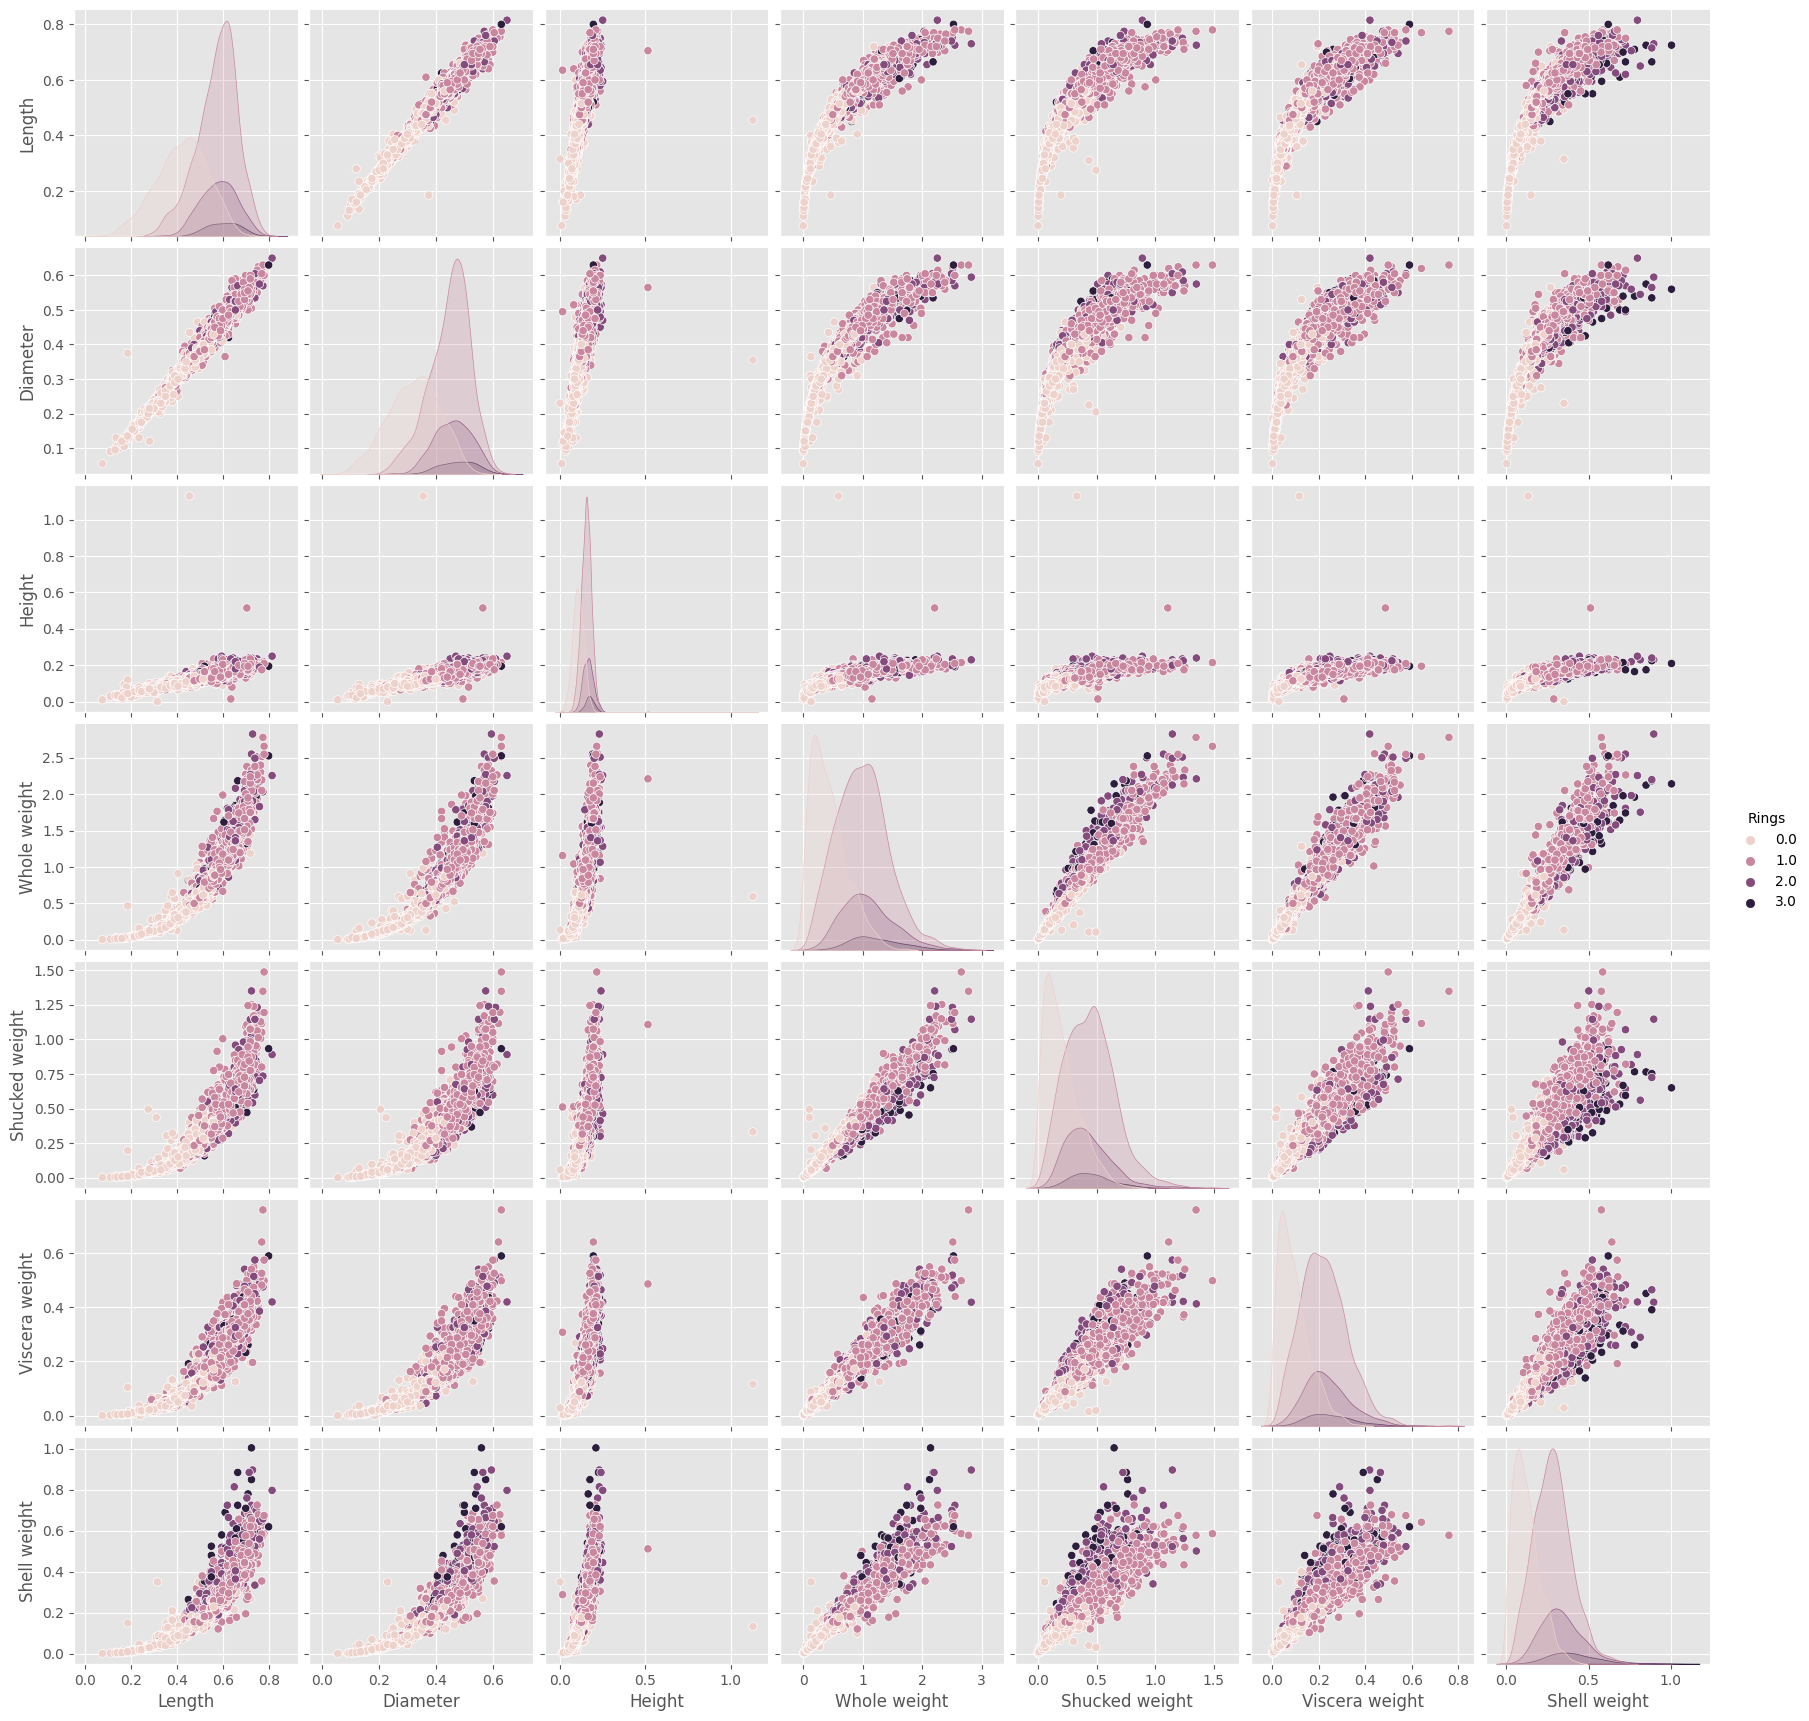

In [158]:
sns.pairplot(df, hue=target)

## 2. Comment the exploration of step 1 pointing out if there are imbalanced distributions, outliers, missing values

We can see from the distributions on the main diagonal of the pairplot that the data is skewed, and from the pairplot we can better see the presence of outliers (especially in class "height")


In [159]:
print("Number of rows with missing values:",df.shape[0]-len(df.dropna(axis=0)))
df.describe()

Number of rows with missing values: 1125


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3997.000000,3976.000000,3987.000000,3990.000000,3983.000000,4002.000000,3990.000000,4177.000000
mean,0.525330,0.408448,0.139669,0.830577,0.360681,0.180995,0.239796,0.861623
std,0.119569,0.098728,0.041988,0.490629,0.221100,0.109425,0.139765,0.762510
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,0.450000,0.350000,0.115000,0.444500,0.188000,0.094000,0.130000,0.000000
50%,0.545000,0.425000,0.140000,0.802250,0.339000,0.171500,0.235000,1.000000
75%,0.615000,0.480000,0.165000,1.154375,0.503250,0.253500,0.330000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,3.000000


As we can see from the table above, features are slightly inbalanced (some classes are more present, like rings and viscera weight)
## 3. Drop the columns that are not relevant for the classification operation, if any, and explain why you do that. Deal with missing values, if any
For the traing set, we dropped the column Sex, since it's the one we have to predict

In [160]:
#drop null rows
df=df.dropna()
# discretize Sex feature, mapping with integer numbers
classes=np.unique(df[target])
n_classes=len(classes)
print("there are", n_classes, "classes:",classes)
# map into integer
discr=lambda x: 0 if x==classes[0] else( 1 if x==classes[1] else 2 )
df["Sex"]=df["Sex"].apply(discr)
# create train and test datasets
X=df.drop(target, axis=1)
y=df[target]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=random_state)



there are 4 classes: [0. 1. 2. 3.]


## 4. find the best classification scheme considering two classification methods, find the best hyperparameters using cross validation; the optimization must be focused on the f1_macro measure


In [161]:
model_lbls = [
              'dt', 
              'nb', 
              'lp', 
              'svc', 
             'knn',
             'adb',
             'rf',
            ]

# Set the parameters by cross-validation
tuned_param_dt = [{'max_depth': [*range(1,20)]}]
tuned_param_nb = [{'var_smoothing': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-07, 1e-8, 1e-9, 1e-10]}]
tuned_param_lp = [{'early_stopping': [True]}]
tuned_param_svc = [{'kernel': ['rbf'], 
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100, 1000],
                    },
                    {'kernel': ['linear'],
                     'C': [1, 10, 100, 1000],                     
                    },
                   ]
tuned_param_knn =[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
tuned_param_adb = [{'n_estimators':[20,30,40,50],
                   'learning_rate':[0.5,0.75,1,1.25,1.5]}]
tuned_param_rf = [{'max_depth': [*range(5,15)],
                   'n_estimators':[*range(10,100,10)]}]

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(), 
           'param': tuned_param_dt,
          },
    'nb': {'name': 'Gaussian Naive Bayes',
           'estimator': GaussianNB(),
           'param': tuned_param_nb
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(),
           'param': tuned_param_lp,
          },
    'svc':{'name': 'Support Vector      ',
           'estimator': SVC(), 
           'param': tuned_param_svc
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': tuned_param_knn
       },
       'adb':{'name': 'AdaBoost           ',
           'estimator': AdaBoostClassifier(),
           'param': tuned_param_adb
          },
    'rf': {'name': 'Random forest       ',
           'estimator': RandomForestClassifier(),
           'param': tuned_param_rf
          }
}



results_short = {}

In [171]:
import warnings
warnings.filterwarnings('ignore')

scores = ['f1_macro']
models_params=[]

for score in scores:
    print('='*40)
    print("# Tuning hyper-parameters for %s" % score)
    print()

    #'%s_macro' % score ## is a string formatting expression
    # the parameter after % is substituted in the string placeholder %s
    for m in model_lbls:
        #print('-'*40)
        #print("Trying model {}".format(models[m]['name']))
        
        clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=5,
                           #scoring='%s_macro' % score, 
                           return_train_score = False,
                           n_jobs = 2, # this allows using multi-cores
                           )

        clf.fit(X_train, y_train)
        y_clf=clf.predict(X_test)
        conf_mat=confusion_matrix(y_test,y_clf)
        #print_results(clf)
        results_short[m] = [clf.best_score_,conf_mat, clf.best_params_]
        




# Tuning hyper-parameters for f1_macro



## 5. Show the performance measures and the confusion matrices for the best hyperparameters of each model

In [172]:
for m in results_short.keys():
    print("{}\t - score: {:4.2}% - params:{}".format(models[m]['name'], results_short[m][0], results_short[m][2]))
    print("Confusion matrix:")
    print(results_short[m][1])
#get confusion matrices
#remove print 
    

Decision Tree       	 - score: 0.65% - params:{'max_depth': 5}
Confusion matrix:
[[184  82   4   0]
 [ 46 340  53   0]
 [  9  92  69   2]
 [  0  17  17   1]]
Gaussian Naive Bayes	 - score: 0.62% - params:{'var_smoothing': 1}
Confusion matrix:
[[213  57   0   0]
 [ 86 353   0   0]
 [ 27 145   0   0]
 [  1  34   0   0]]
Linear Perceptron   	 - score: 0.55% - params:{'early_stopping': True}
Confusion matrix:
[[ 69 201   0   0]
 [  3 413  23   0]
 [  1 111  60   0]
 [  0  15  20   0]]
Support Vector      	 - score: 0.66% - params:{'C': 10, 'kernel': 'linear'}
Confusion matrix:
[[211  59   0   0]
 [ 62 365  12   0]
 [ 10 116  46   0]
 [  0  17  18   0]]
K Nearest Neighbor 	 - score: 0.66% - params:{'n_neighbors': 9}
Confusion matrix:
[[213  55   2   0]
 [ 78 329  32   0]
 [ 13 104  53   2]
 [  2  18  14   1]]
AdaBoost           	 - score: 0.65% - params:{'learning_rate': 0.75, 'n_estimators': 20}
Confusion matrix:
[[201  69   0   0]
 [ 58 373   8   0]
 [ 10 144  18   0]
 [  0  27   8   0]]


In [173]:
# get the best model with the highest score
best_model = max(results_short, key=results_short.get)
print("Best model is {} with score {:4.2}%".format(models[best_model]['name'], results_short[best_model][0]))
print("Confusion matrix:")
print(results_short[best_model][1])

Best model is Random forest        with score 0.67%
Confusion matrix:
[[207  62   1   0]
 [ 64 338  37   0]
 [ 10  99  62   1]
 [  0  17  17   1]]
